# Python Week 4 - Case study 2
## Shahin Mammadov

You are a Data Scientist working for the World Health Organization (WHO). Due to the
outbreak of 2019-nCoV, WHO is alerted to several cases of pneumonia and wants to know
how this virus will affect the population, specifically whether the Healthcare System in place is
capable of addressing this issue. Therefore, you are asked to predict next 7-days 2019-nCoV
cumulative Confirmed, Infected, Recovered, Death cases using Linear Regression Model.

In [99]:
import pandas as pd

In [100]:
data = pd.read_csv("covid_19_data.csv")

In [101]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6722 entries, 0 to 6721
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              6722 non-null   int64  
 1   ObservationDate  6722 non-null   object 
 2   Province/State   3956 non-null   object 
 3   Country/Region   6722 non-null   object 
 4   Last Update      6722 non-null   object 
 5   Confirmed        6722 non-null   float64
 6   Deaths           6722 non-null   float64
 7   Recovered        6722 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 420.2+ KB


In [103]:
data.isnull().mean()

SNo                0.000000
ObservationDate    0.000000
Province/State     0.411485
Country/Region     0.000000
Last Update        0.000000
Confirmed          0.000000
Deaths             0.000000
Recovered          0.000000
dtype: float64

## Data preparation

In [104]:
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])

In [105]:
data['ObservationDate'][0]

Timestamp('2020-01-22 00:00:00')

Now we need to drop the unnecessary data, such as SN0, because we dont need indexing, and we drop text variables and also last updated as they serve no purpose 

In [106]:
data.drop(['SNo', 'Province/State', 'Country/Region', 'Last Update'], axis = 1, inplace = True)

In [107]:
data.head()

,ObservationDate,Confirmed,Deaths,Recovered
0,2020-01-22,1.0,0.0,0.0
1,2020-01-22,14.0,0.0,0.0
2,2020-01-22,6.0,0.0,0.0
3,2020-01-22,1.0,0.0,0.0
4,2020-01-22,0.0,0.0,0.0


In [108]:
daily_observation = data.groupby('ObservationDate').sum()
daily_observation.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [109]:
daily_observation['Infected'] = daily_observation['Confirmed'] - daily_observation['Recovered'] - daily_observation['Deaths']
daily_observation = daily_observation.reset_index()
daily_observation.head()

,ObservationDate,Confirmed,Deaths,Recovered,Infected
0,2020-01-22,555.0,17.0,28.0,510.0
1,2020-01-23,653.0,18.0,30.0,605.0
2,2020-01-24,941.0,26.0,36.0,879.0
3,2020-01-25,1438.0,42.0,39.0,1357.0
4,2020-01-26,2118.0,56.0,52.0,2010.0


In [110]:
daily_observation['which day'] = (daily_observation['ObservationDate'] - daily_observation['ObservationDate'].min()).dt.days+1
daily_observation.head()

,ObservationDate,Confirmed,Deaths,Recovered,Infected,which day
0,2020-01-22,555.0,17.0,28.0,510.0,1
1,2020-01-23,653.0,18.0,30.0,605.0,2
2,2020-01-24,941.0,26.0,36.0,879.0,3
3,2020-01-25,1438.0,42.0,39.0,1357.0,4
4,2020-01-26,2118.0,56.0,52.0,2010.0,5


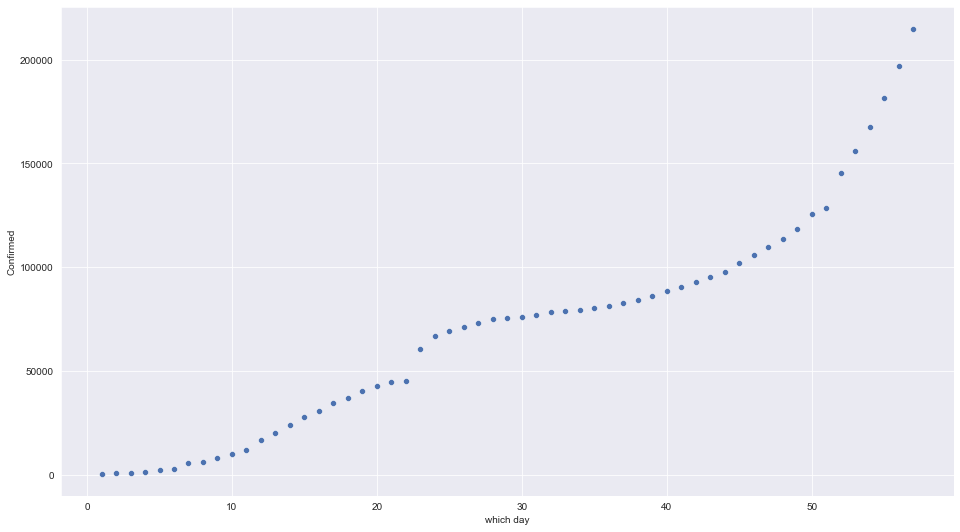

In [111]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set({'figure.figsize':(16,9)})
sns.scatterplot(x='which day', y='Confirmed', data=daily_observation)
plt.show()

## Training - Infected

In [131]:
X = daily_observation.loc[:,['which day']].values.reshape(-1,1)
y = daily_observation['Infected'].values.reshape(-1,1)

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

In [133]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

regressor.score(X_test, y_test)

0.41677363321921745

In [134]:
from sklearn import metrics
import numpy as np
R2 = metrics.r2_score(y_test, y_pred)

print('R^2:', R2)
print('Adjusted R^2:', 1 - metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.41677363321921745
Adjusted R^2: 0.5832263667807825
Mean Absolute Error: 15215.824307657318
Mean Squared Error: 294638194.7859253
Root Mean Squared Error: 17165.02824891137


In [135]:
max_day = daily_observation['which day'].max()
future_predict = np.arange(max_day+1, max_day+7).reshape(-1,1)
regressor.predict(future_predict)

array([[81245.50543255],
       [82615.14741967],
       [83984.78940679],
       [85354.4313939 ],
       [86724.07338102],
       [88093.71536813]])

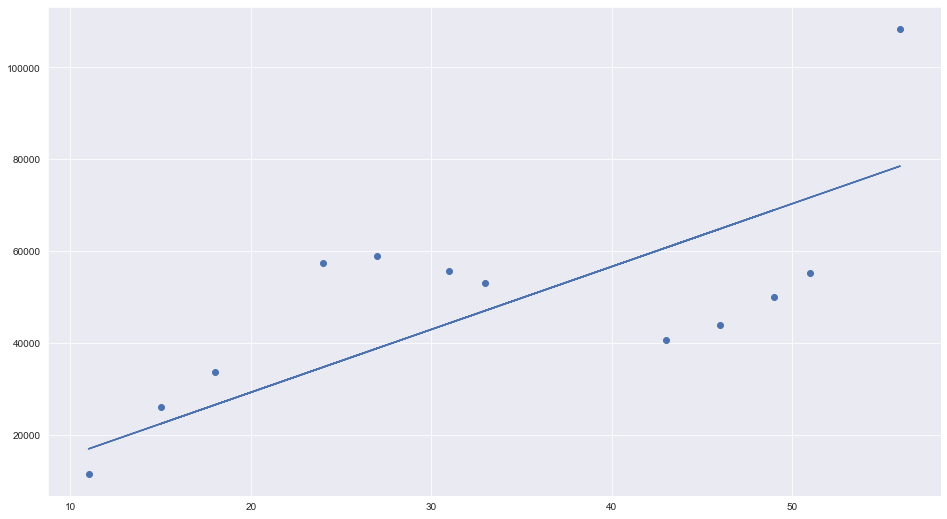

In [138]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.show()

## Training - Confirmed

In [139]:
X = daily_observation.loc[:,['which day']].values.reshape(-1,1)
y = daily_observation['Confirmed'].values.reshape(-1,1)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

In [141]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

regressor.score(X_test, y_test)

0.9268596270942584

In [142]:
R2 = metrics.r2_score(y_test, y_pred)

print('R^2:', R2)
print('Adjusted R^2:', 1 - metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.9268596270942584
Adjusted R^2: 0.0731403729057416
Mean Absolute Error: 10091.21347316765
Mean Squared Error: 200532526.02948436
Root Mean Squared Error: 14160.950745959268


In [143]:
regressor.predict(future_predict)

array([[157441.87762794],
       [160422.03315375],
       [163402.18867955],
       [166382.34420535],
       [169362.49973116],
       [172342.65525696]])

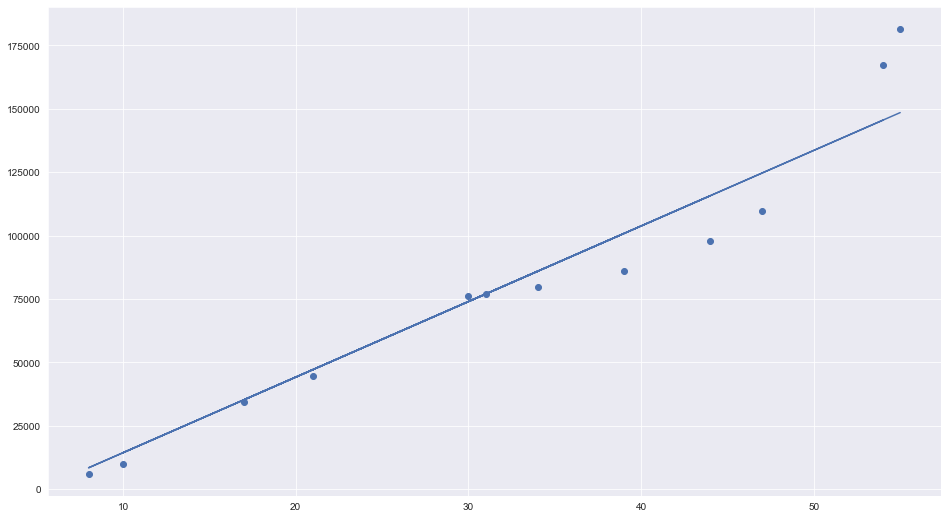

In [144]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.show()

## Training - Deaths

In [145]:
X = daily_observation.loc[:,['which day']].values.reshape(-1,1)
y = daily_observation['Deaths'].values.reshape(-1,1)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

In [147]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

regressor.score(X_test, y_test)

0.8159206762515758

In [148]:
R2 = metrics.r2_score(y_test, y_pred)

print('R^2:', R2)
print('Adjusted R^2:', 1 - metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.8159206762515758
Adjusted R^2: 0.18407932374842417
Mean Absolute Error: 670.4404382831108
Mean Squared Error: 1136105.9999529787
Root Mean Squared Error: 1065.8827327398537


In [149]:
regressor.predict(future_predict)

array([[5575.07852415],
       [5689.32080555],
       [5803.56308696],
       [5917.80536837],
       [6032.04764977],
       [6146.28993118]])

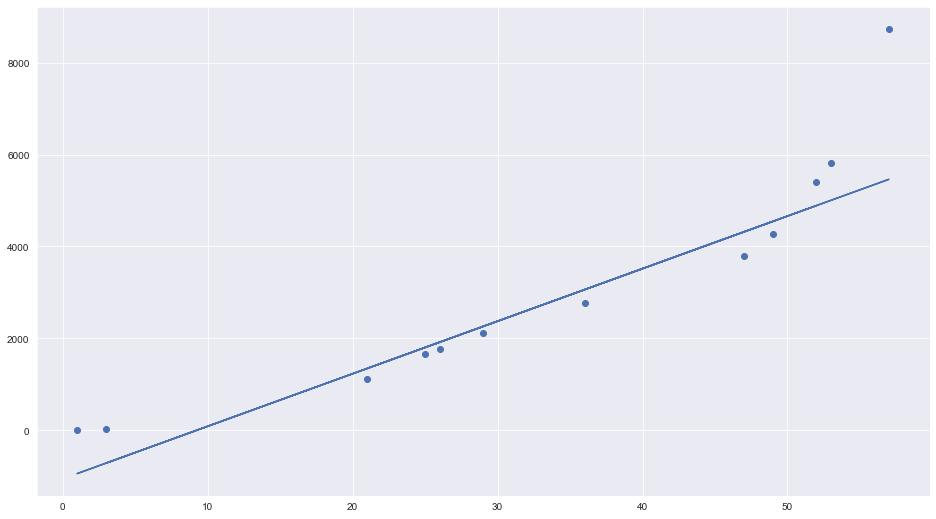

In [150]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.show()

## Training - Recovered

In [151]:
X = daily_observation.loc[:,['which day']].values.reshape(-1,1)
y = daily_observation['Recovered'].values.reshape(-1,1)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

In [153]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

regressor.score(X_test, y_test)

0.902239164135037

In [154]:
R2 = metrics.r2_score(y_test, y_pred)

print('R^2:', R2)
print('Adjusted R^2:', 1 - metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.902239164135037
Adjusted R^2: 0.09776083586496298
Mean Absolute Error: 9008.78902535459
Mean Squared Error: 101966638.08585207
Root Mean Squared Error: 10097.853142418544


In [155]:
regressor.predict(future_predict)

array([[70753.65757356],
       [72316.90397972],
       [73880.15038587],
       [75443.39679203],
       [77006.64319819],
       [78569.88960434]])

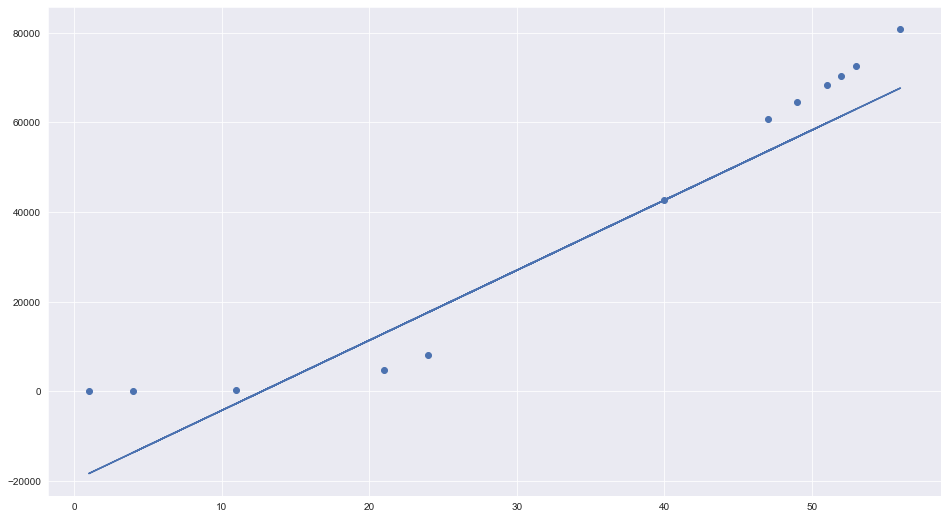

In [156]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.show()